# **HW6: Cross-Validation & Nearest Neighbor Classifier**
### **Steven Yoo**

**Attention: This is an individual assignment.**



In this homework assignment, you will implement the k-Nearest Neighbors (k-NN) algorithm and use cross-validation to evaluate its performance. By the end of this assignment, you should have a deeper understanding of both the k-NN algorithm and the concept of cross-validation.

**Cross-Validation**

We learned in lecture that K-fold cross validation is a resampling technique used to evaluate the performance of machine learning models. The process of k-fold cross validtaion is as follows:

* splitting the dataset into k folds,
* then, training the model on k-1 folds,
* finally, testing it on the remaining fold.


This process is repeated k times, with each fold being used as the test set once. The results are typically averaged to obtain ***a more robust estimate of your model's performance.***

#### **The Dataset**

In this assignment, you will be using the Wine dataset, which contains 13 chemical measurements for wine samples from three different cultivars in Italy. The objective is to use the k-Nearest Neighbors (k-NN) algorithm to classify the wine samples into one of the three cultivars. (A cultivar means a variety of a plant that has been deliberately selected for specific desirable characteristics for wine.)

Additionally, you'll employ cross-validation to evaluate and optimize the performance of your k-NN classifier.



### **Load and Explore the Dataset**

Load the Wine dataset through `scikit-learn` and visually explore the relationships between different chemical measurements.

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import seaborn as sns

# Load the Wine dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)

#define the target variable which is "cultivar"
df['cultivar'] = data.target

display(df.shape)
# Display the first 5 rows
df.head()

(178, 14)

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  cultivar  
0                          3.92   1065.0         0  
1                          3.40   1050.0         0  
2                          3.17   1185.0         0  
3                          3.45   1480.0         0  
4                          2.93    735.0         0

### **The Pairplot**

The `sns.pairplot()` function below provides a grid of scatter plots, where each plot represents the relationship between two features of the dataset. The plots along the diagonal represent histograms of individual features. These histograms provide insights into the distribution of each feature. By examining the histograms, you can gauge the distribution (e.g., normal, skewed) of each feature and observe potential outliers or irregularities.

**Off-Diagonal Plots:**

Each scatter plot in the off-diagonal part represents the relationship between two features. The x-axis represents one feature, and the y-axis represents another feature. Each point in the scatter plot corresponds to a sample in the dataset. The color of the points is determined by the hue parameter. In this case, it's the cultivar, so each color represents a different cultivar.

**Interpreting Scatter Pairplots:**

A scatter plot can show whether two features have a linear relationship (positive or negative correlation), a non-linear relationship, or no discernible relationship. If all the points tend to group by color (representing the cultivar in this context), it suggests that those two features can help discriminate between cultivars. If the points of different colors are mixed without distinct grouping, it implies that those two features might not be as useful for distinguishing between the cultivars.

**Overall Purpose of pairplot:**

The pairplot is a quick way to visualize relationships between all pairs of features in the dataset. It can help identify patterns, correlations, and feature relationships that might be important for classification or other tasks.
For a classification task, like with the wine cultivars, the goal is to find features that help separate the data into distinct, non-overlapping groups corresponding to the classes (cultivars, in this case).

To effectively use the pairplot, look for scatter plots where data points of different colors (cultivars) are well-separated. These feature pairs might be particularly useful for classification. Observe the distribution of individual features. Features with distinct distributions for different classes can be valuable for classification. If two features exhibit a strong correlation (linear or non-linear), they might provide redundant information, so you might not need to use both in your model.

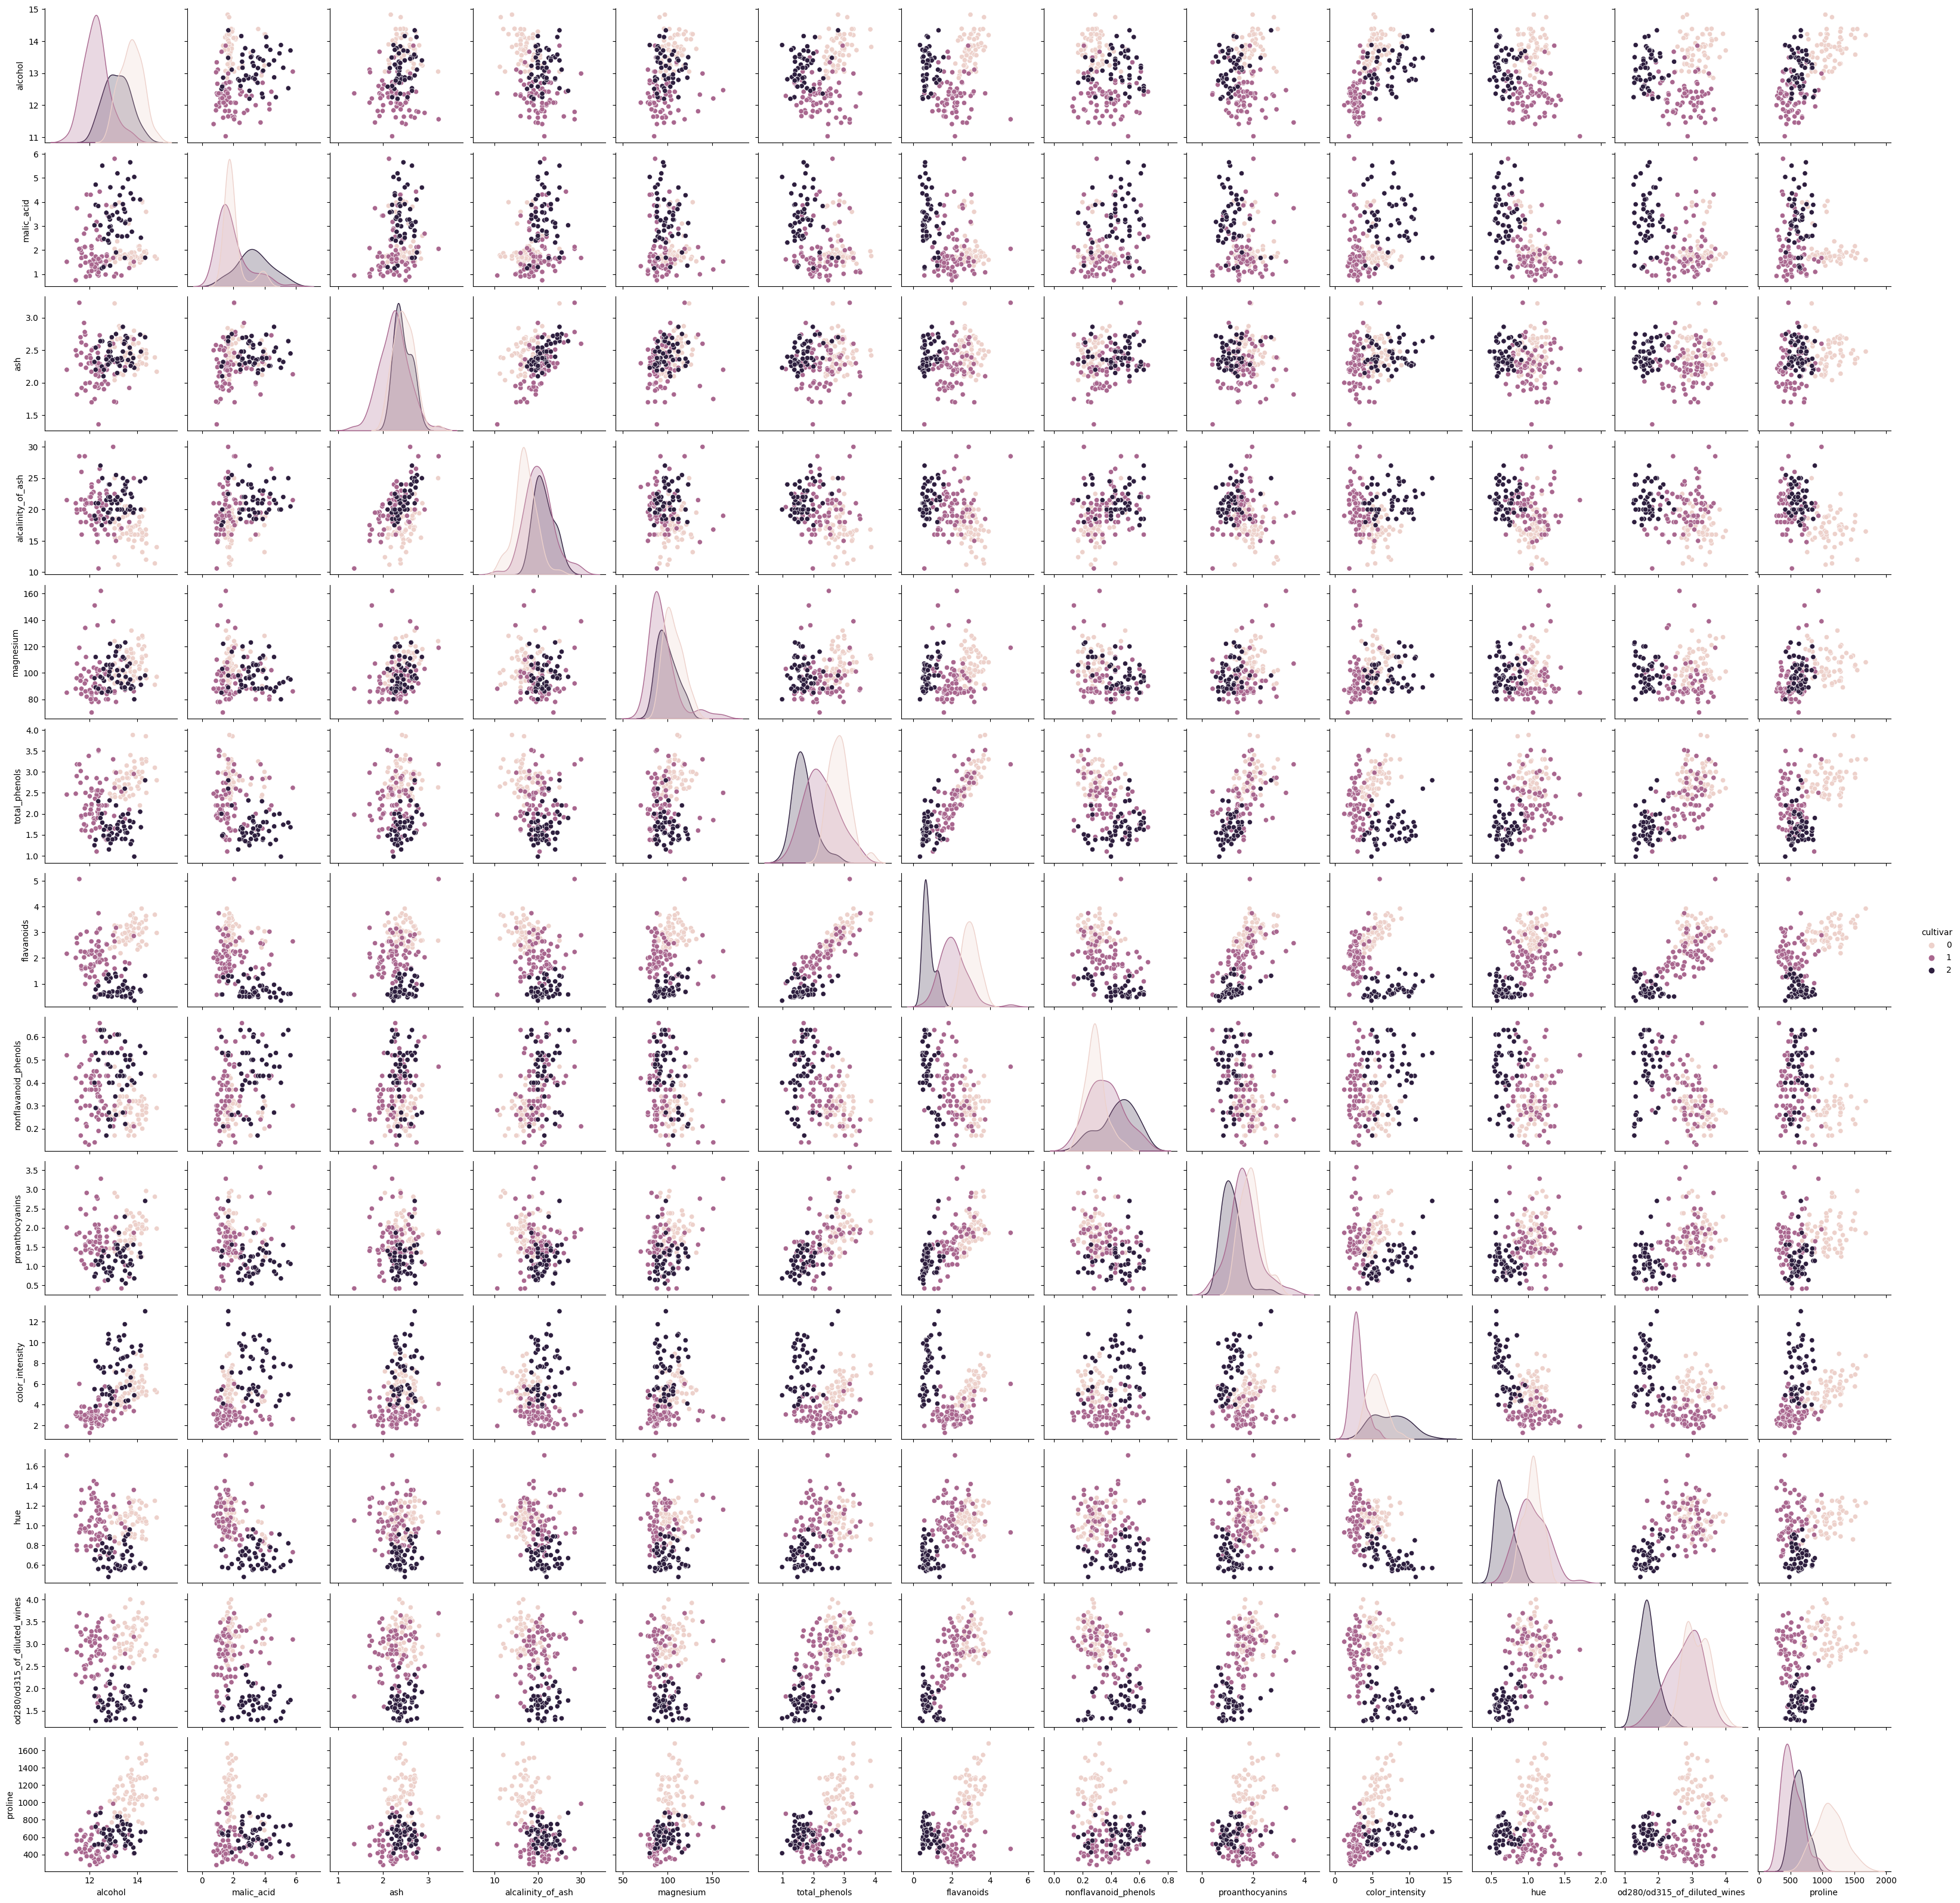

In [2]:
# Visualize the relationships between features
sns.pairplot(df, hue='cultivar')

### **Task 1: Interpret the Pairplot**


In the `sns.pairplot()` visualization with the `hue='cultivar'` argument above, the color of each data point in the scatter plots represents its cultivar. So, while each scatter plot visualizes the relationship between two features, the color-coding adds a third dimension that represents the cultivar. This means that every scatter plot actually shows the relationship between two features as well as how the cultivar is distributed with respect to those two features.


**Question:**

Based on the pair plots generated, can you identify one or two features that seem to have a strong relationship with the cultivar of the wine? Describe how the different cultivars are distributed with respect to these features. Additionally, are there any features that don't seem to provide clear distinctions between the cultivars?

**Hints:**

1. Look for plots where data points of different colors (representing different cultivars) are well-separated. This suggests that those features might be particularly useful for distinguishing between the cultivars.

2. On the contrary, plots where data points of different colors are mixed without clear boundaries might indicate that those features are not as effective in distinguishing between cultivars.

### **TODO: Write your answer to Task 1 here:**

Answer: It seems like proline has a strong relationship with cultivar because it has the different colors most separated. On the contrary, ash and alcalinity_of_ash might not be as effective in distinguishing between cultivars because the colors are mixed without clear boundaries (which makes sense because ash and alcalinity_of_ash are likely related with one another).

## **Task 2: Implement k-NN Algorithm**

Given the chemical measurements of wine samples in the wine dataset, implement the k-NN algorithm in a python function named `predict_wine_cultivar`, using `scikit-learn` KNeighborsClassifier() classifier to predict the "cultivar" of a wine sample.  The function splits the dataset into a training set (80%) and a test set (20%) using a fixed random seed for reproducibility. The accuracy is computed on the test set. Your function should have two paramerers:

- data
- k

Start with *k=3*.
Your function should not return a value but it should print the accuracy score of the k-NN classifier of the given k value.

Your function should include a complete docstring.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def predict_wine_cultivar(data, k=3):
  """
    Predicts the wine cultivar using the k-NN algorithm and evaluates its performance.

    Parameters:
    - data: The wine dataset, typically loaded from sklearn.datasets.load_wine().
    - k (int, optional): The number of nearest neighbors to be considered for prediction. Default is 3.

    Returns:
    None. The function prints the accuracy of the k-NN classifier for the given value of k.
  """
  # Split the dataset using the appropriate method from scikit learn
  X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42)

  # Implement the k-NN classifier
  knn = KNeighborsClassifier(n_neighbors=k)

  #fit the classifier
  knn.fit(X_train, y_train)

  # Predict and compute accuracy
  y_pred = knn.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)

  print(f"Accuracy for k={k}: {accuracy:.4f}")

# Call your function on the wine dataset from scikit-learn library with k=3
from sklearn.datasets import load_wine
data = load_wine()
predict_wine_cultivar(data, k=3)

Accuracy for k=3: 0.8056


## **Task 3: Cross-Validation**

Now, you will evaluate different values of k on the wine dataset using cross validation.

1) First, read the official documentation for [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html) and [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) from `scikit-learn` library.

2) Then, given the chemical measurements of wine samples, implement a new python function named `evaluate_knn_with_cross_validation` that takes two parameters:

* `data`: this is the wine dataset that you will later assign
* `k_values=[]` : this is a python list for the values of k that you will later assign

This function will implement k-NN classifier(s) using `scikit-learn` `KNeighborsClassifier` and evaluate its performance using 5-fold cross-validation. Evaluate the performance for different values of k.

3) Specifically, test for `k=1,3,5,7`.

4) Your function does not need to return anything, but it needs to print the average accuracy of the k-NN classifier for each value of k using 5-fold cross-validation.

5) Your function needs to have a complete docstring.


In [4]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
data = load_wine()

def evaluate_knn_with_cross_validation(data, k_values):
  """
    Evaluates the performance of the k-NN algorithm on the wine dataset using 5-fold cross-validation for a list of k values.

    Parameters:
    - data: The wine dataset, typically loaded from sklearn.datasets.load_wine().
    - k_values (list of int): A list of integer values for k, representing the number of nearest neighbors to consider for prediction.

    Returns:
    None. The function prints the average accuracy of the k-NN classifier for each value of k using 5-fold cross-validation.
  """
  # Using KFold(), Implement 5-fold cross-validation, use n_splits=5, shuffle=True, and a random_state value
  kf = KFold(n_splits=5, shuffle=True, random_state=42)

  # Evaluate performance for different k values in a for loop
  for k in k_values:
      knn = KNeighborsClassifier(n_neighbors=k)
      scores = cross_val_score(knn, data.data, data.target, cv=kf)
      average_score = scores.mean()
      print(f"Average accuracy for k={k}: {average_score:.4f}")

# Call your function on the wine dataset with specific values for k
k_values =[1, 3, 5, 7]
evaluate_knn_with_cross_validation(data, k_values)

Average accuracy for k=1: 0.7305
Average accuracy for k=3: 0.7083
Average accuracy for k=5: 0.6746
Average accuracy for k=7: 0.6800


## **Task 4: Optimize the Value of k**

In Task 3, the cross-validation has been tested on a given list. In thistask we will apply it in a given range to determine the optimal value of k for the k-NN algorithm that provides the highest classification accuracy.

Implement the `optimize_k_for_knn()` Function

You are tasked with implementing a function that evaluates the performance of the k-NN algorithm for a range of k values using 5-fold cross-validation on a given dataset. The function should determine which k value gives the highest average accuracy.

Follow these steps to complete the implementation:

1) Function Signature: Your function should accept two parameters:
* `data` (the dataset)
* `k_range` (a range of k values).
The default value for k_range should be from 1 to 16.

2) Docstring: Begin your function with a docstring that explains its purpose, its parameters, and its return values.

3) Cross-Validation Setup: Use the KFold() method from `scikit-learn` to set up 5-fold cross-validation. Ensure the data is shuffled and use a fixed random_state for reproducibility. Create a loop that iterates over each value of k in `k_range`.For each k value, instantiate a k-NN classifier and perform cross-validation to obtain a list of accuracy scores. Compute the average accuracy for the current k and store it in a list. Some inline comments are also provided to guide you.

4) Determine Optimal k: After evaluating all k values, determine the k value that resulted in the highest average accuracy.

5) Your function should return two values: The optimal k value and the list of average accuracies for each k value. To test your function, call it on the provided wine dataset and examine the optimal k value and the first five accuracy values.

In [5]:
import matplotlib.pyplot as plt

def optimize_k_for_knn(data, k_range=range(1, 16)):
    """
    Evaluates the performance of the k-NN algorithm for a range of k values using 5-fold cross-validation.

    Parameters:
    - data: The dataset containing features and target.
    - k_range: A range of k values to evaluate. Default is 1 to 15.

    Returns:
    - optimal_k: The k value that gives the highest average accuracy.
    - accuracies: A list containing average accuracies for each k value.
    """
    # Using KFold(), Implement 5-fold cross-validation, use n_splits=5, shuffle=True, and a random_state value
    kf = KFold(n_splits=5, shuffle=True, random_state=42)

    # Create a list to hold the list of accuracies
    accuracies = []

    for k in k_range:
        # instantiate a k-NN classifier
        knn = KNeighborsClassifier(n_neighbors=k)

        # store the cross validation scores
        scores = cross_val_score(knn, data.data, data.target, cv=kf)

        # append the mean of the scores to teh list of accuracies
        accuracies.append(scores.mean())

    # optimal_k is maximum of the accuracies
    optimal_k = k_range[accuracies.index(max(accuracies))]

    # return the optimal_k and accuracies
    return optimal_k, accuracies

# Call the function
optimal_k_value, accuracy_values = optimize_k_for_knn(data)
optimal_k_value, accuracy_values[:5]  # Displaying the optimal k value and the first 5 accuracy values for brevity


(1,
 [0.7304761904761905,
  0.6625396825396825,
  0.7082539682539682,
  0.6577777777777778,
  0.6746031746031746])

## **Task 5: Visualize Cross Validation**

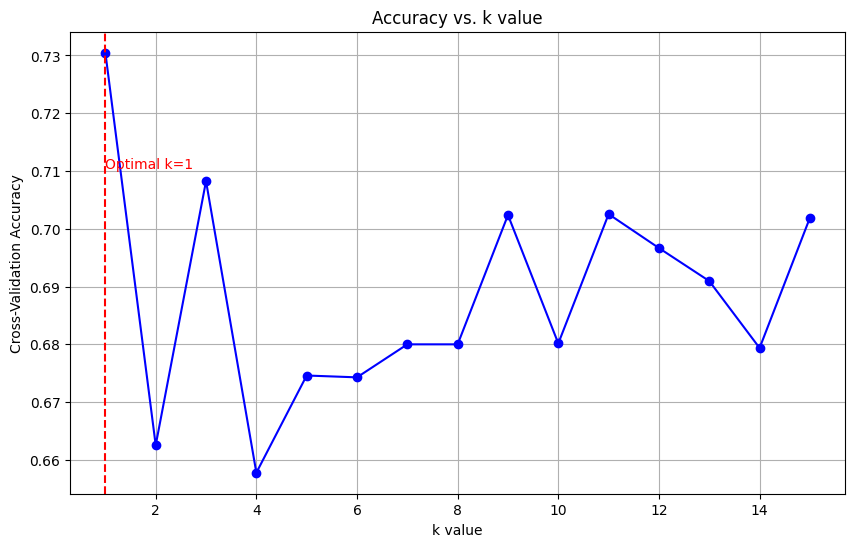

In [6]:
import matplotlib.pyplot as plt

def plot_knn_accuracy(k_range, accuracies):
    """
    Plots the average accuracies for different k values of k-NN.

    Parameters:
    - k_range: The range of k values.
    - accuracies: List of average accuracies corresponding to each k.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, accuracies, marker='o', linestyle='-', color='b')
    plt.title('Accuracy vs. k value')
    plt.xlabel('k value')
    plt.ylabel('Cross-Validation Accuracy')
    plt.grid(True)
    optimal_k = k_range[accuracies.index(max(accuracies))]
    plt.axvline(x=optimal_k, color='r', linestyle='--')
    plt.text(optimal_k, max(accuracies)-0.02, f'Optimal k={optimal_k}', color='r')
    plt.show()


optimal_k_value, accuracy_values = optimize_k_for_knn(data)

# Now, you can visualize the results:
plot_knn_accuracy(range(1,  16), accuracy_values)
